# 05. Descreptives
In this notebook we load the data from the json-files for RF. As the descriptive analysis is independent from the mdoel there is no need to load the data of the XGBoost Model.

## Load json data for RF 

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils_boxplots import flatten_data, plot_eval
import numpy as np
import seaborn as sns
from tabulate import tabulate

# remove waringns
import warnings
warnings.filterwarnings("ignore")


#### First: Random Forest
# set file path to json files (change model) -> get names of json files
json_path = "../results/rf/"
json_files = os.listdir(json_path)


# load data from json file
data = []
for file in json_files:
    with open(json_path + file) as f:
        data_new = json.load(f)
        data = data + data_new

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
data = pd.DataFrame(data_all_flatten)
print('Shape of data', data.shape)
print('Colum names of data', data.columns)
print('Number of Colums', data.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)


# check for duplicates ind data
print('Duplicates: ', data.astype(str).duplicated().sum())


data.head()

Shape of data (4800, 75)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterat

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,cv_folds_descriptives_unstratified_intersection_area,cv_folds_descriptives_stratified_ks_statistic,cv_folds_descriptives_stratified_p_value,cv_folds_descriptives_stratified_intersection_area,unstratified_best_params_min_samples_split,unstratified_best_params_min_samples_leaf,unstratified_best_params_max_features,stratified_best_params_min_samples_split,stratified_best_params_min_samples_leaf,stratified_best_params_max_features
0,rf,200,100000,8,0,identity,5,5,200,30,...,0.877017,0.025,1.0,0.957862,2,1,8,2,1,6
1,rf,200,100000,8,0,identity,5,5,200,30,...,0.874369,0.025,1.0,0.947189,4,1,7,5,1,6
2,rf,200,100000,8,0,identity,5,5,200,30,...,0.897163,0.025,1.0,0.959497,2,1,7,2,1,7
3,rf,200,100000,8,0,identity,5,5,200,30,...,0.886524,0.025,1.0,0.955489,2,1,6,2,1,5
4,rf,200,100000,8,0,identity,5,5,200,30,...,0.881115,0.025,1.0,0.964351,2,1,7,4,1,5


In [2]:
model_vars = ['model_info_transformation', 'model_info_n_train',	'model_info_noise',	'model_info_group_size']
model_vars_title =  [s.rsplit('_', 1)[-1] for s in model_vars]

data['param_model'] = data.loc[:, model_vars].astype(str).agg('_'.join, axis=1)
print('Shape of data', data.shape)
data['param_model'].head()

Shape of data (4800, 76)


0    identity_200_0_5
1    identity_200_0_5
2    identity_200_0_5
3    identity_200_0_5
4    identity_200_0_5
Name: param_model, dtype: object

# Descriptive Analysis

Boxplots per unique experimental parameter combination comparing strativied vs. unstratified: 

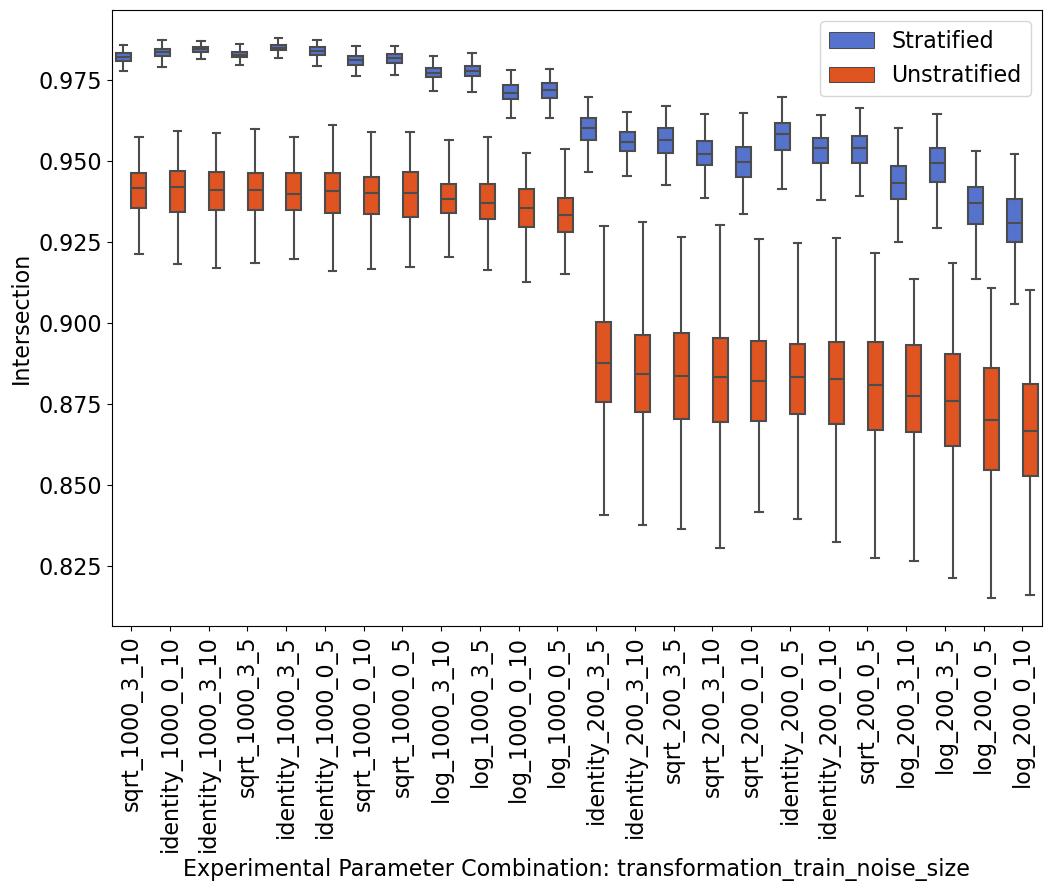

   Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
5                        identity_200_0_5         0.075775      -0.011865   
21                           sqrt_200_0_5         0.072926      -0.012281   
7                        identity_200_3_5         0.072798      -0.013215   
4                       identity_200_0_10         0.072670      -0.014889   
23                           sqrt_200_3_5         0.072221      -0.011109   
6                       identity_200_3_10         0.071967      -0.014395   
15                            log_200_3_5         0.071911      -0.012318   
22                          sqrt_200_3_10         0.069765      -0.014595   
20                          sqrt_200_0_10         0.067591      -0.012417   
13                            log_200_0_5         0.065605      -0.012120   
12                           log_200_0_10         0.065211      -0.010804   
14                           log_200_3_10         0.064872      -0.011612   

In [3]:
# rename colums that startified and unstratified is written at the end
data = data.rename(columns={'cv_folds_descriptives_stratified_intersection_area': 'cv_folds_descriptives_intersection_area_stratified', 'cv_folds_descriptives_unstratified_intersection_area': 'cv_folds_descriptives_intersection_area_unstratified'})

differences_table_all = plot_eval(value_vars= ['cv_folds_descriptives_intersection_area_stratified', 'cv_folds_descriptives_intersection_area_unstratified'] , 
          value_name = 'Intersection', 
          data = data, model_vars_title = '_'.join(model_vars_title), transformation = 'None', model = 'None', figsize = (12, 8))

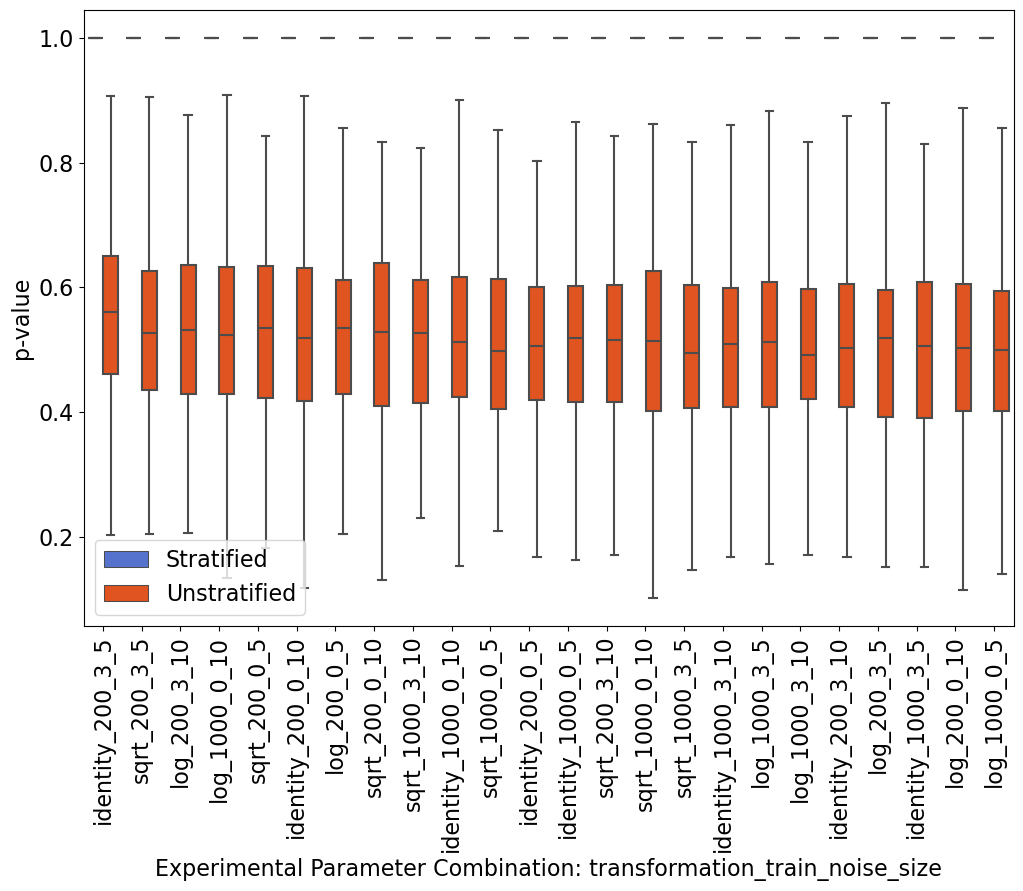

   Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
9                            log_1000_0_5         0.502754      -0.142622   
12                           log_200_0_10         0.498571      -0.146730   
3                       identity_1000_3_5         0.495521      -0.147798   
15                            log_200_3_5         0.494704      -0.147933   
6                       identity_200_3_10         0.493819      -0.140076   
10                          log_1000_3_10         0.492997      -0.147874   
11                           log_1000_3_5         0.492704      -0.143864   
2                      identity_1000_3_10         0.492609      -0.139501   
19                          sqrt_1000_3_5         0.492099      -0.144273   
16                         sqrt_1000_0_10         0.490146      -0.151370   
22                          sqrt_200_3_10         0.490058      -0.143815   
1                       identity_1000_0_5         0.489923      -0.147574   

In [4]:
# rename colums that startified and unstratified is written at the end
#data = data.rename(columns={'cv_folds_descriptives_stratified_p_value': 'variable_stratified', 'cv_folds_descriptives_stratified_p_value': 'variable_unstratified'})
data['variable_stratified'] = data['cv_folds_descriptives_stratified_p_value']
data['variable_unstratified'] = data['cv_folds_descriptives_unstratified_p_value']

differences_table_all = plot_eval(value_vars= ['variable_stratified', 'variable_unstratified'] , 
          value_name = 'p-value', 
          data = data, model_vars_title = '_'.join(model_vars_title), transformation = 'None', model = 'None', figsize = (12, 8))